# Compare VGG and ResNet

In [73]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

# Import data from pickle file

In [74]:
with open('results.pkl', 'rb') as f:
    results = pickle.load(f)

In [75]:
for var_name, var_value in results.items():
    globals()[var_name] = var_value

In [76]:
all_vars = locals()
for var_name, var_value in all_vars.items():
        print(var_name, var_value)

__name__ __main__
__doc__ Automatically created module for IPython interactive environment
__package__ None
__loader__ None
__spec__ None
__builtin__ <module 'builtins' (built-in)>
__builtins__ <module 'builtins' (built-in)>
_ih ['', 'import pickle', "with open('results.pkl', 'rb') as f:\n    results = pickle.load(f)", 'for var_name , var_value in results.items():\n    globals()[var_name] = var_value', 'for i , var_value in enumerate(results):\n    globals()[f"var{i}"] = var_value', 'train_loss_resnet', "all_vars = locals()\nfor var in all_vars:\n    if var.startswith('var'):\n        print(var)", "all_vars = locals()\nfor var_name , var_value in all_vars.items():\n    if var_name.startswith('var'):\n        print(var_name , var_value)", 'all_vars = locals()\nfor var_name , var_value in all_vars.items():\n    print(var_name : , var_value)', 'all_vars = locals()\nfor var_name , var_value in all_vars.items():\n    print(var_name, ":" , var_value)', '#get val names \nval_names = [var_name

# VGG vs ResNet

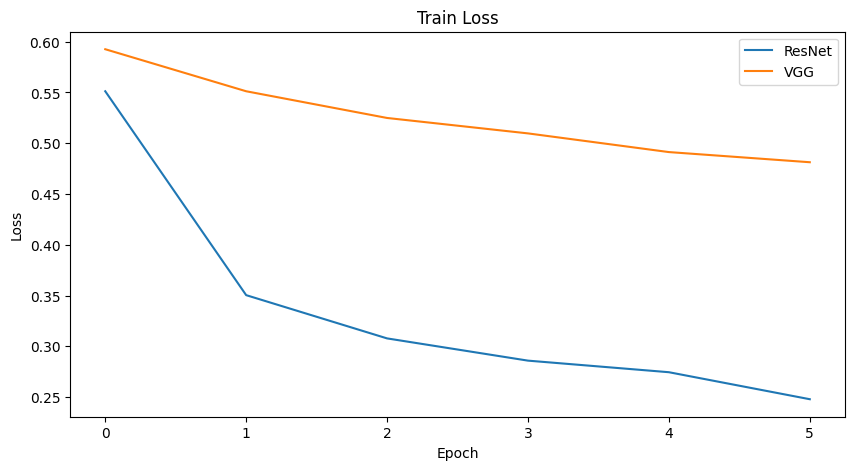

In [77]:
#compare VGG and ResNet train and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_loss_resnet, label='ResNet')
plt.plot(train_loss_vgg, label='VGG')
plt.title('Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

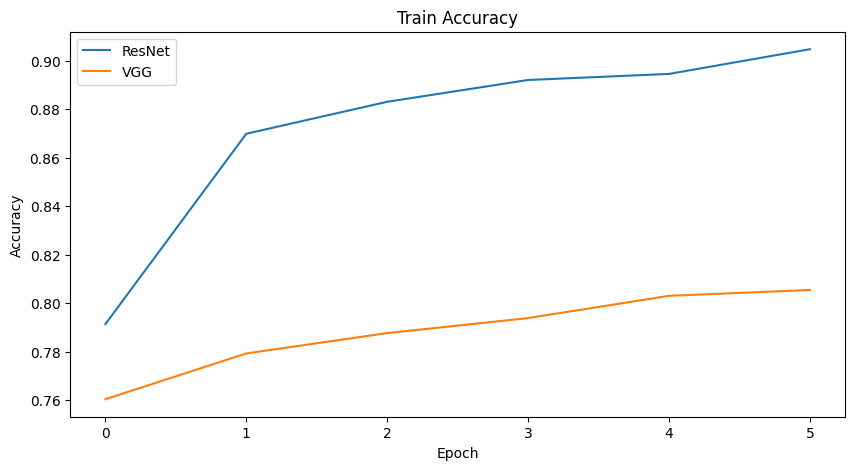

In [78]:
#compare VGG and ResNet train and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_acc_resnet, label='ResNet')
plt.plot(train_acc_vgg, label='VGG')
plt.title('Train Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


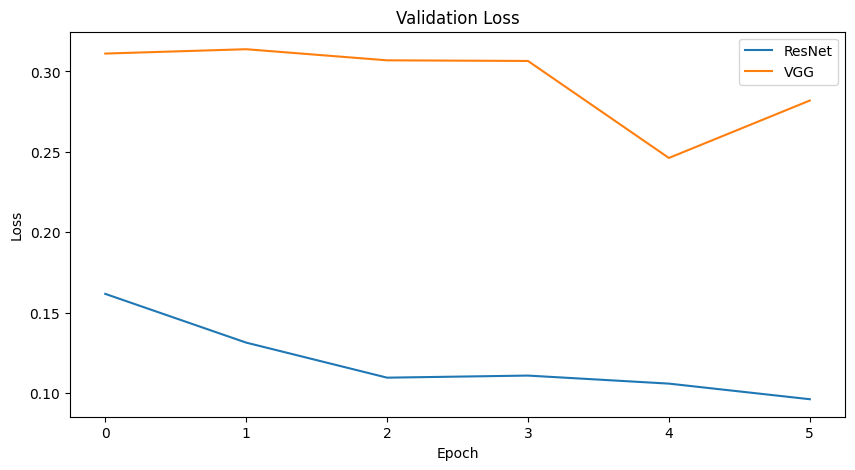

In [79]:
#compare VGG and ResNet train and validation loss
plt.figure(figsize=(10, 5))
plt.plot(val_loss_resnet, label='ResNet')
plt.plot(val_loss_vgg, label='VGG')
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

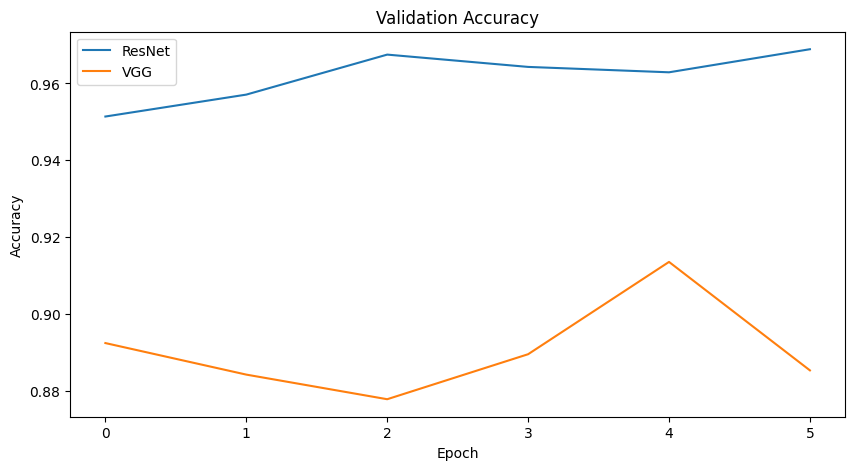

In [80]:
#compare VGG and ResNet train and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(val_acc_resnet, label='ResNet')
plt.plot(val_acc_vgg, label='VGG')
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

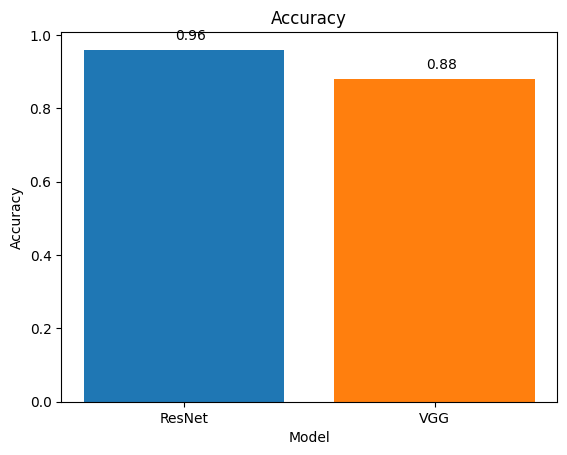

In [81]:
#compare accuracy
models = ['ResNet', 'VGG']
accuracies = [accuracy_resnet, accuracy_vgg]

for i, model in enumerate(models):
    plt.bar(model, accuracies[i])
    plt.annotate(f'{accuracies[i]:.2f}', (i, accuracies[i]), xytext=(5,5), textcoords='offset points', ha='center', va='bottom')

plt.title('Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')

plt.show()

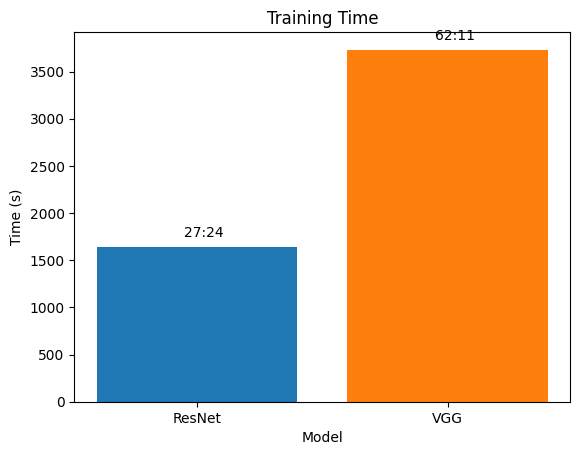

In [82]:
#compare training time
times = [time_resnet, time_vgg]

for i, model in enumerate(models):
    plt.bar(model, times[i])
    minutes = int(times[i] / 60)
    seconds = int(times[i] % 60)
    annotate_text = f'{minutes:02d}:{seconds:02d}'
    plt.annotate(annotate_text, (i, times[i]), xytext=(5,5), textcoords='offset points', ha='center', va='bottom')

plt.title('Training Time')
plt.xlabel('Model')
plt.ylabel('Time (s)')
plt.show()

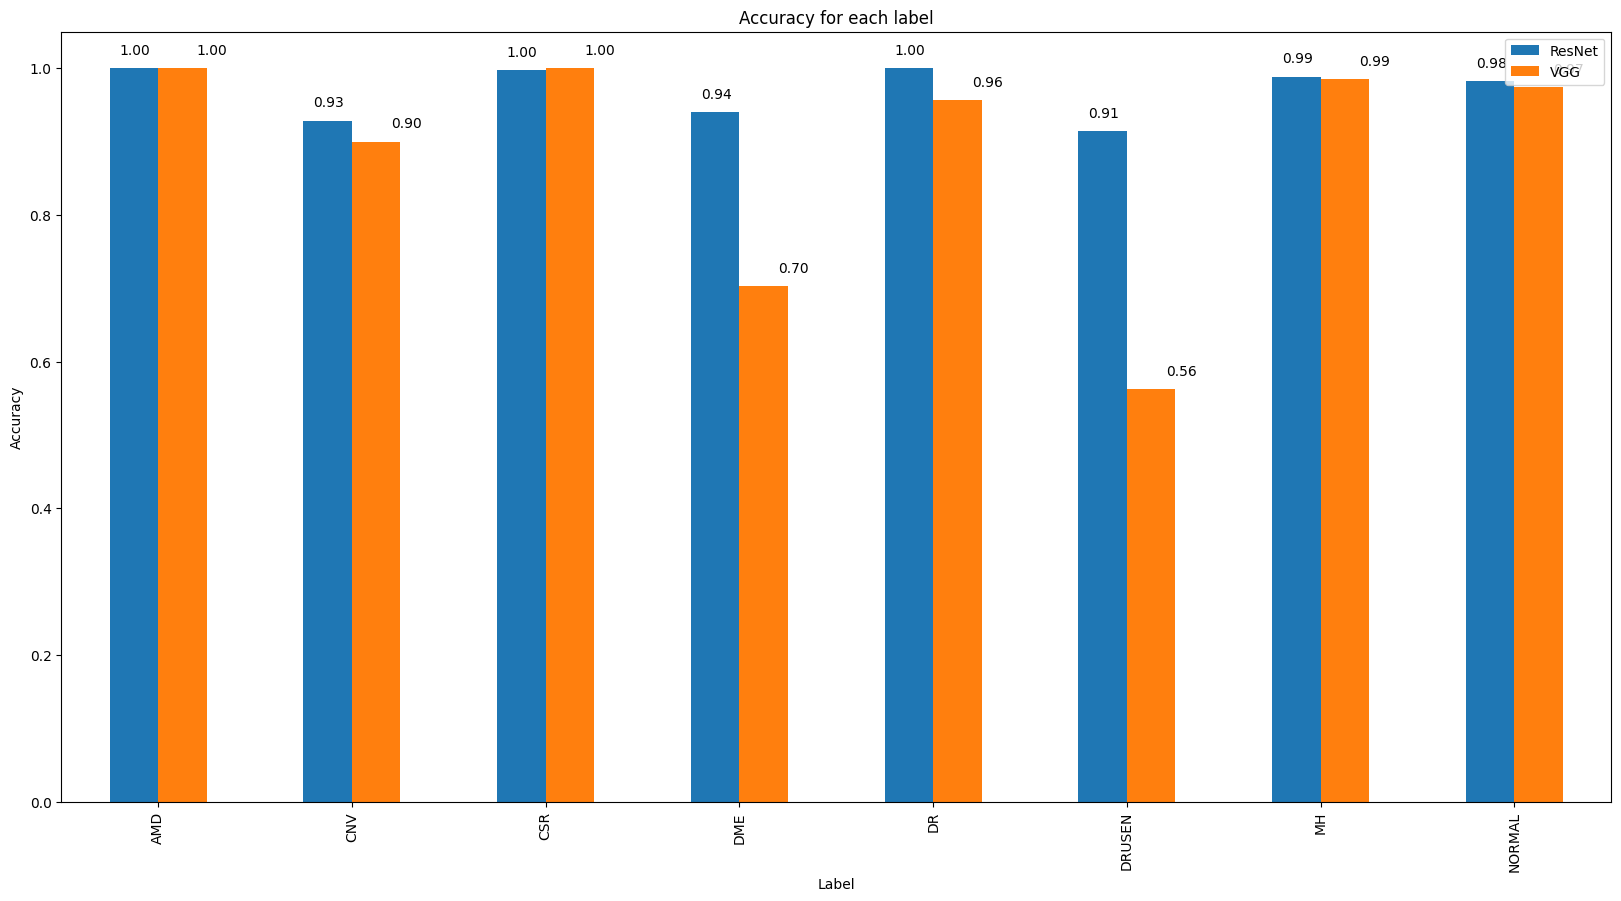

In [90]:
#compare accuracy for each label
label_acc_resnet_df = pd.DataFrame.from_dict(label_acc_resnet, orient='index', columns=['ResNet'])
label_acc_vgg_df = pd.DataFrame.from_dict(label_acc_vgg, orient='index', columns=['VGG'])

label_acc = pd.concat([label_acc_resnet_df, label_acc_vgg_df], axis=1)
ax = label_acc.plot.bar(figsize=(20, 10))

for i in range(len(label_acc)):
    resnet_acc = label_acc.iloc[i]['ResNet']
    vgg_acc = label_acc.iloc[i]['VGG']
    ax.annotate(f'{resnet_acc:.2f}', (i-0.2, resnet_acc), xytext=(0,10), textcoords='offset points')
    ax.annotate(f'{vgg_acc:.2f}', (i+0.2, vgg_acc), xytext=(0,10), textcoords='offset points')

plt.title('Accuracy for each label')
plt.xlabel('Label')
plt.ylabel('Accuracy')
plt.show()